### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=2
max_qubits=8
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these lines when running on hardware backend, to limit use of resources
min_qubits=4
max_qubits=4
max_circuits=4
# num_shots=100

HHL Benchmark Program - Qiskit
... execution starting at 2022-01-05 07:23:23
************
Executing [4] circuits with num_qubits = 4
  ... i=0 s_int=10000  beta=1.0
  ... i=1 s_int=0  beta=0.0
  ... i=2 s_int=9000  beta=0.9
  ... i=3 s_int=1000  beta=0.1
For secret int 10000 measured: {'11': 551, '10': 200, '00': 185, '01': 64}
  ... ratio_exp=0.1111111111111111  ratio_counts=0.1161524500907441
  ... fidelity = 0.9565972222222222
For secret int 0 measured: {'01': 552, '00': 192, '10': 202, '11': 54}
  ... ratio_exp=9.0  ratio_counts=10.222222222222221
  ... fidelity = 0.8804347826086957
For secret int 9000 measured: {'10': 79, '01': 217, '11': 629, '00': 75}
  ... ratio_exp=0.1848341232227488  ratio_counts=0.3449920508744038
  ... fidelity = 0.5357634263000415
For secret int 1000 measured: {'01': 604, '10': 78, '11': 245, '00': 73}
  ... ratio_exp=5.451612903225806  ratio_counts=2.4653061224489794
  ... fidelity = 0.4522159159521797
************
Average Depth, ξ (xi) for the 4 qubit gr

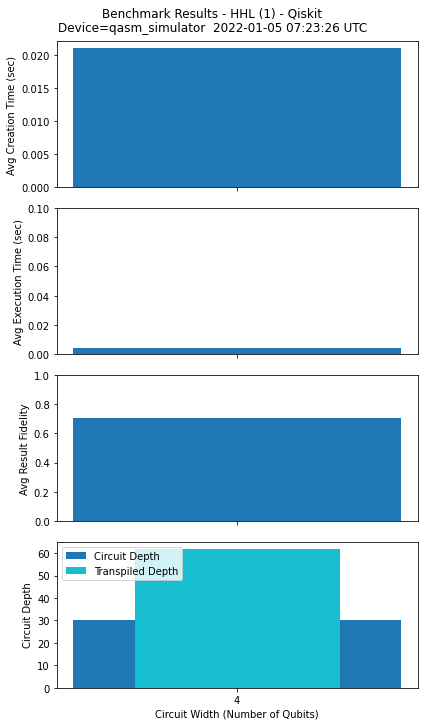

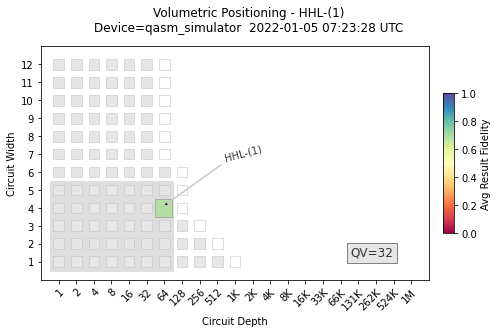

In [2]:
#%run bernstein-vazirani/qiskit/hhl_benchmark.py
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

hhl_benchmark.verbose=True

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

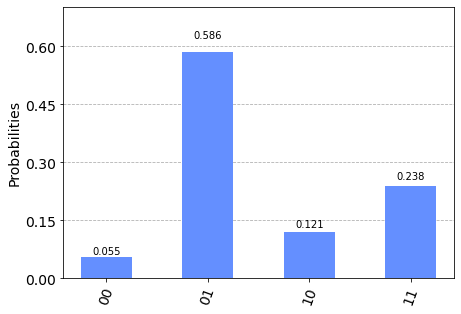

In [3]:
from qiskit.visualization import plot_histogram

# Get the counts, the frequency of each answer
counts = hhl_benchmark.saved_result.get_counts()

# Display the results
plot_histogram(counts)

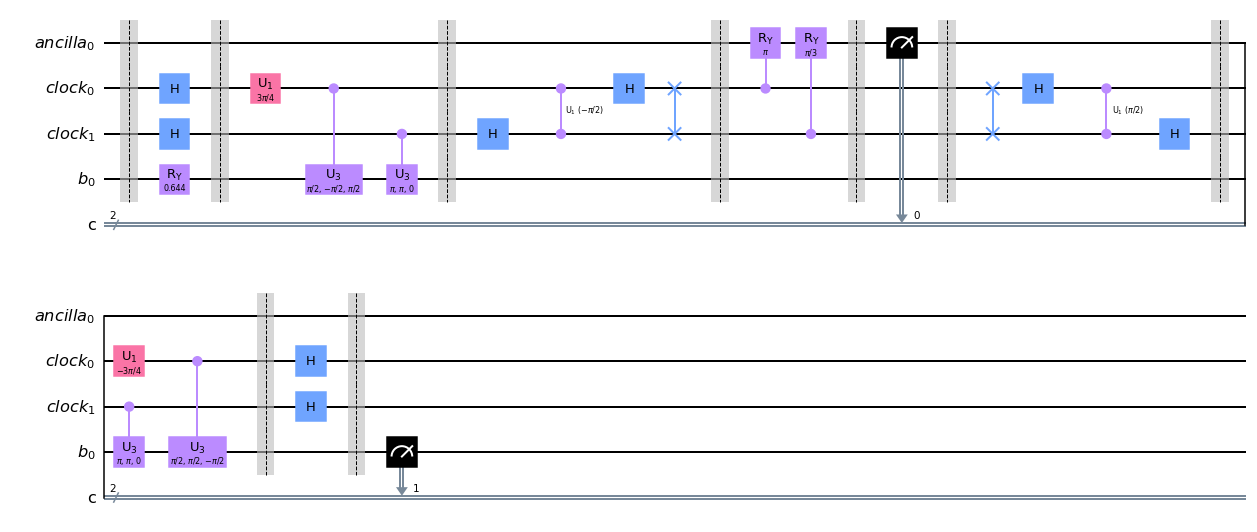

In [4]:
hhl_benchmark.QC_.draw('mpl',scale=1)
#print(circuit)